 <h1 align="center" style="color:#4ca8ed">
    Обробка та аналіз БМД.<br>
    Группа: БС-81<br>
    Мумінов А.O.<br>
    Практикум Номер 4
</h1>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("whitegrid")

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.
    </span>
</p>

In [2]:
data_var = [];
for i in range(0,6):
    if(i%2 == 0):
        data_var.append(sorted(np.random.normal(0,(i+1),20)))
    else:
        data_var.append(sorted(np.random.exponential(i,20)))

for i in data_var:
    print("РЯДОК - "+ str(i) + "\n")

РЯДОК - [-1.9830000429242218, -1.7332036021225656, -1.2455037442560195, -1.1326026732877605, -0.840538303925942, -0.8219249296347232, -0.8058539667250375, -0.6318452707247332, -0.5265956311918296, -0.31547876297595095, -0.04170294601044206, -0.008495244040362322, 0.6638088474750526, 0.9287130876696289, 0.9942980070454941, 1.1380677537566515, 1.2465694591355323, 1.3314114627571767, 1.4838858260312133, 2.029243478508658]

РЯДОК - [0.03372207911019287, 0.1540990951388362, 0.19134922415976, 0.3029482578116615, 0.335649896379635, 0.3401283048418265, 0.45004787968327686, 0.4888767686420177, 0.5142225508905897, 0.6048795327593408, 0.6373380432241897, 0.6752538115549755, 0.9378494519815728, 1.072065601898297, 1.1078323519449338, 1.2178846622312862, 1.2195810385557442, 2.2037260227157653, 2.239607619872502, 3.8533150280329664]

РЯДОК - [-3.876929972162187, -3.226349570677673, -2.495386653313476, -1.6092020249339438, -1.5878016528898105, -1.3287995649751982, -1.1207573677631486, -0.8655248246148

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
    </span>
</p>

In [3]:
def schapiro_uilk(array,n):
    a = [
        (0.0081356*(n**4) - 1.3596*(n**3) + 87.592*(n**2) - 2808.2*n + 78028)/100000,
        (0.0005642*(n**5) - 0.096475*(n**4) + 6.418*(n**3)- 204.59*(n**2) + 2849.1*n + 19225)/100000,
        (-0.000053*(n**6) +0.010464*(n**5) - 0.83717*(n**4) + 35.172*(n**3) - 823.97*(n**2) + 10190*n - 26059)/100000,
        (-0.00008785*(n**6) + 0.017143*(n**5) - 1.3644*(n**4) + 56.8921*(n**3) - 1321.67*(n**2) + 16417.8*n - 64907)/100000,
        (-0.0000637*(n**6) + 0.012953*(n**5) - 1.08323*(n**4) + 47.9523*(n**3) - 1197.88*(n**2) + 16280.8*n - 77227)/100000,
        (0.001213*(n**5) - 0.22039*(n**4) + 15.932*(n**3) - 578.01*(n**2) + 10675.3*n - 64930)/100000,
        (0.001058*(n**5) - 0.19846*(n**4) + 14.8811*(n**3) - 563.328*(n**2) + 10954*n - 74246)/100000,
        (0.0009663*(n**5) - 0.18425*(n**4) + 14.2448*(n**3) - 558.464*(n**2) + 11321.7*n - 83480)/100000,
        (0.000936*(n**5) - 0.18321*(n**4) + 14.431*(n**3) - 578.383*(n**2) + 12047.5*n - 94506)/100000,
        (-0.021445*(n**4) + 3.5688*(n**3) - 227.115*(n**2) + 6687*n - 66534)/100000,
        (-0.01937*(n**4) + 3.3178*(n**3) - 218.207*(n**2) + 6675*n - 70767)/100000,
        (-0.01757*(n**4) + 3.0973*(n**3) - 210.36*(n**2) + 6671.5*n - 74844)/100000,
        (-0.01577*(n**4) + 2.8668*(n**3) - 201.302*(n**2) + 6621.8*n - 78311)/100000,
        (0.4448*(n**3) - 64.902*(n**2) + 3325*n - 51098)/100000,
        (0.4227*(n**3) - 63.247*(n**2) + 3332.2*n - 53673)/100000,
        (0.4046*(n**3) - 61.999*(n**2) + 3353.2*n - 56378)/100000,
        (0.3853*(n**3) - 60.444*(n**2) + 3354.8*n - 58703)/100000,
        (0.3532*(n**3) - 57.207*(n**2) + 3282.5*n - 59931)/100000,
        (-11.224*(n**2) + 1322.1*n - 33480)/100000,
        (-11.072*(n**2) + 1331.1*n - 35023)/100000,
    ]
    a.reverse()
    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(array)
    nm = 0
    for i in array:
        nm += (i-m)**2

    b = 0
    for i in range(k):
        b += a[n-i-1]*(array[n-i-1] - array[i])
    w = (b**2)/nm
    
    w_table = [
        (-0.0148*(n**4) + 2.1875*(n**3) - 122.61*(n**2) + 3257.3*n + 55585)/100000,
        (-0.0113*(n**4) + 1.656*(n**3) - 91.88*(n**2) + 2408.6*n + 67608)/100000,
        (-0.0084*(n**4) + 1.2513*(n**3) - 70.724*(n**2)+ 1890*n + 73840)/100000
    ]
    if(w > w_table[2]):
        #return ('%.3f'%w) +" normal"
        return "normal"
    else:
        #return ('%.3f'%w) +" non-normal"
        return "non-normal"

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.<br>
        <span style = "margin-left:25px;font-size:90%">Variable - назви змінних.<br></span>
        <span style = "margin-left:25px;font-size:90%">Distribution - результати роботи криетрію Шапіро-Уілка<br></span>
         <span style = "margin-left:25px;font-size:90%">Для всіх змінних, що розподілені за нормальним законом - середне значення та стандартне відхилення<br></span>
         <span style = "margin-left:25px;font-size:90%">Для всіх змінних, що розподілені за не нормальним законом - медіану та інтерквартильний розмах<br></span>
    </span>
</p>

(0.0, 1.0, 0.0, 1.0)

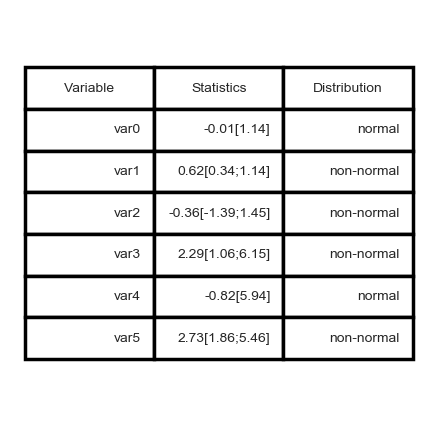

In [4]:
#d = {'x{}'.format(i): range(20) for i in range(3)}
table_st = pd.DataFrame({
    'Variable': [("var"+str(i)) for i in range(6)], 
    'Statistics':
        ['%.2f[%.2f]' % (np.mean(data_var[i]),np.std(data_var[i]))
             if (schapiro_uilk(data_var[i],20)=="normal") else 
         '%.2f[%.2f;%.2f]' % (np.median(data_var[i]), np.quantile(data_var[i],0.25),np.quantile(data_var[i],0.75)) 
         for i in range(6)]
    , 
    'Distribution':[schapiro_uilk(data_var[i],20) for i in range(6)]
})
    
fig = plt.figure(figsize=(2,2), dpi=250)
ax=fig.add_subplot(111)
cell_text = []
for row in range(len(table_st)):
    cell_text.append(table_st.iloc[row])

ax.table(cellText=cell_text, colLabels=table_st.columns, loc='center')
ax.axis('off')

<p style="color:#4ca8ed">
    <span style="margin-left:50px;font-size:150%">
        4. Зберегти таблицю в пдф форматі 
    </span>
</p>

In [5]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()
table_st

,Variable,Statistics,Distribution
0,var0,-0.01[1.14],normal
1,var1,0.62[0.34;1.14],non-normal
2,var2,-0.36[-1.39;1.45],non-normal
3,var3,2.29[1.06;6.15],non-normal
4,var4,-0.82[5.94],normal
5,var5,2.73[1.86;5.46],non-normal
